# Exercises
Do your work for this exercise in a file named explore.

In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import nltk.sentiment

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from wordcloud import WordCloud

In [2]:
plt.rc('figure', figsize=(16,8))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')

## 1. Spam Data

## a. Load the spam data set.

In [3]:
spam = pd.read_csv('spam_clean.csv')

In [4]:
spam.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [5]:
bigrams = pd.Series(nltk.bigrams(spam.text)).value_counts()

In [6]:
bigrams.head()

(Are we doing the norm tomorrow? I finish just a 4.15 cos of st tests. Need to sort library stuff out at some point tomo - got letter from today - access til end march so i better get move on!, Yeah. I got a list with only u and Joanna if I'm feeling really anti social)                                              1
(When you get free, call me, How have your little darlings been so far this week? Need a coffee run tomo?Can't believe it's that time of week already Û_)                                                                                                                                                                  1
(I think it's all still in my car, Can a not?)                                                                                                                                                                                                                                                                              1
(Hello, my love ! How went your day ? Are you 

## This stuff, is **crazy messy** when we dont clean it first!

In [7]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [8]:
df = spam

In [9]:
all_words = clean(' '.join(df.text))
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))

In [10]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words)).value_counts()

In [11]:
ham_bigrams = pd.Series(nltk.bigrams(ham_words)).value_counts()

(-0.5, 799.5, 399.5, -0.5)

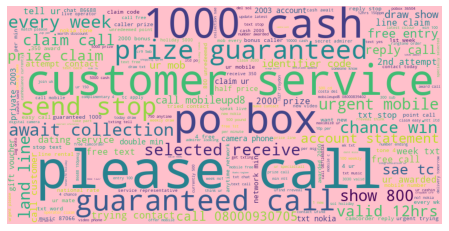

In [12]:
data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
img = WordCloud(background_color='pink', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

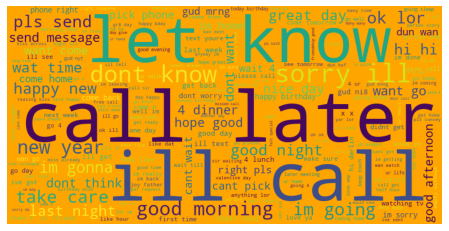

In [13]:
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img = WordCloud(background_color='orange', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## c. Is there any overlap in the bigrams for the spam data and the ham data?

In [14]:
ham_bigrams

(call, later)        52
(ill, call)          48
(let, know)          42
(sorry, ill)         39
(dont, know)         33
                     ..
(hint, hint)          1
(meeting, k)          1
(trouser, da)         1
(doesnt, mention)     1
(meeting, want)       1
Length: 30763, dtype: int64

In [15]:
spam_bigrams

(please, call)                     44
(customer, service)                27
(1000, cash)                       25
(po, box)                          24
(guaranteed, call)                 23
                                   ..
(help, freemsg)                     1
(la3, 2wu)                          1
(08717890890150, per)               1
(stoptxtstop150week, forwarded)     1
(18, rct)                           1
Length: 6854, dtype: int64

In [16]:
overlap = (pd.concat([ham_bigrams, spam_bigrams], axis=1, sort=True)
          .set_axis(['ham', 'spam'], axis=1, inplace=False)
          .fillna(0)
          .apply(lambda s: s.astype(int))
          .reset_index())

overlap['bigrams'] = overlap.level_0 + ", " + overlap.level_1
overlap = overlap.drop(columns=['level_0', 'level_1'])

In [17]:
overlap['overlap'] = overlap.ham == overlap.spam

In [18]:
overlap[overlap['overlap']==1].sum().tail(1)

overlap    68
dtype: object

>- There are 68 rows that overlap between the ham and spam columns

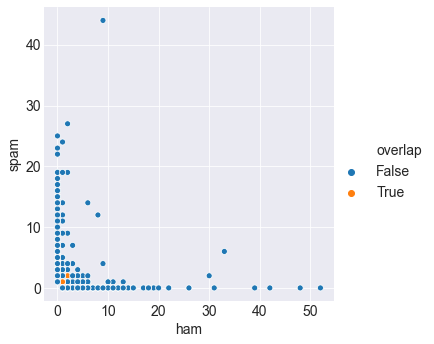

In [19]:
# every dot is a phrase and where it is dictates how many times used
sns.relplot(data=overlap, y='spam', x='ham', hue='overlap')

### Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [20]:
ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3)).value_counts()
spam_trigrams = pd.Series(nltk.ngrams(spam_words, 3)).value_counts()

In [21]:
ham_trigrams

(ill, call, later)         42
(sorry, ill, call)         38
(happy, new, year)         19
(pls, send, message)       13
(pick, phone, right)       12
                           ..
(south, african, soil)      1
(seem, actually, k)         1
(good, morning, repair)     1
(jay, good, morning)        1
(road, liked, hey)          1
Length: 35176, dtype: int64

In [22]:
spam_trigrams

(prize, guaranteed, call)     21
(call, customer, service)     15
(reply, call, 08000930705)    14
(land, line, claim)           14
(2003, account, statement)    13
                              ..
(britney, fml, lastest)        1
(date, even, flirt)            1
(fastest, growing, men)        1
(darling, 3, week)             1
(dogging, network, txting)     1
Length: 8082, dtype: int64

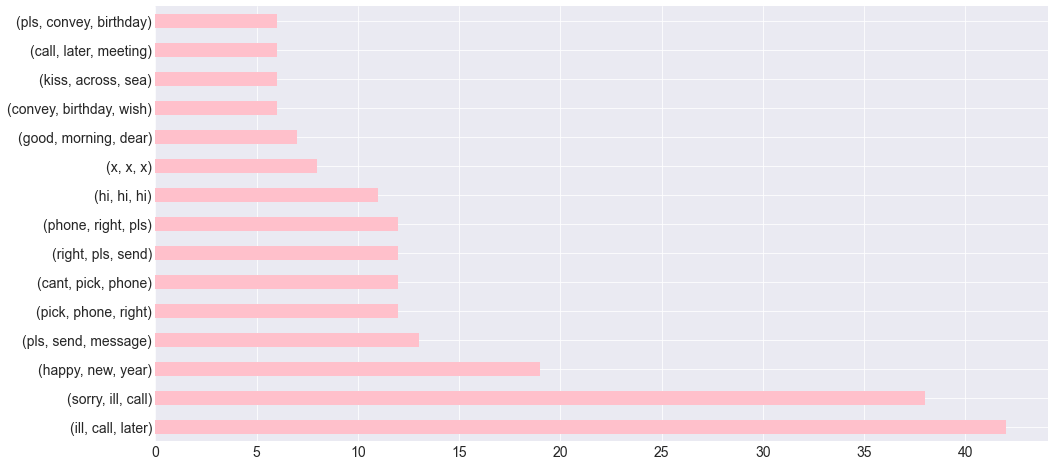

In [23]:
pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(15).plot.barh(color='pink')

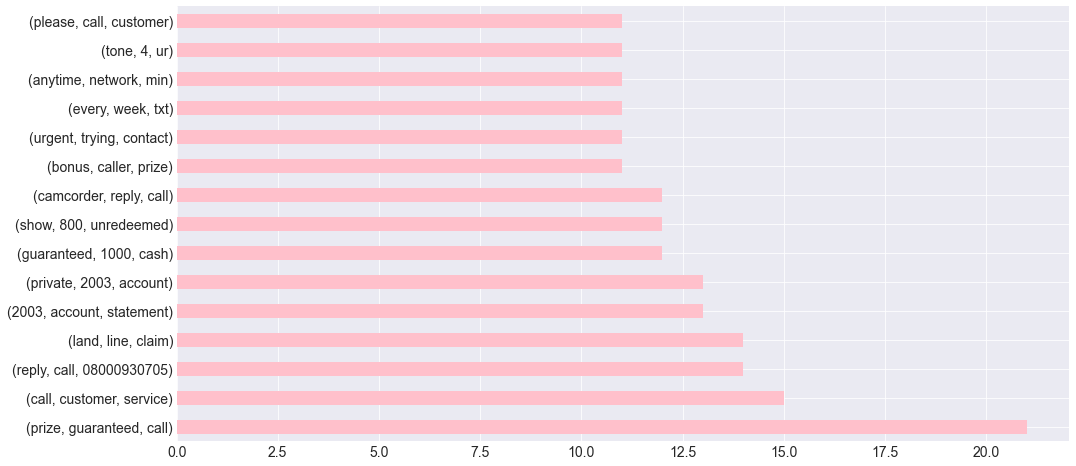

In [24]:
pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(15).plot.barh(color='pink')

2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [25]:
import prepare
df = prepare.get_article_data()

In [26]:
df.head()

,title,original,stemmed,lemmatized,clean
0,From Bootcamp to Bootcamp: Two Military Vetera...,Are you a veteran or active-duty military memb...,are you a veteran or activeduti militari membe...,are you a veteran or activeduty military membe...,veteran activeduty military member considering...
1,How to Get Started On Any Programming Exercise,Programming is hard. Whether you’re just begin...,program is hard whether your just begin to lea...,programming is hard whether youre just beginni...,programming hard whether youre beginning learn...
2,The Best Path to a Career in Data Science,"In our blog, “The Best Path To A Career In Sof...",in our blog the best path to a career in softw...,in our blog the best path to a career in softw...,blog best path career software development loo...
3,Getting Hired in a Remote Environment,As a career accelerator with a tuition refund ...,as a career acceler with a tuition refund guar...,a a career accelerator with a tuition refund g...,career accelerator tuition refund guarantee al...
4,The Remote Codeup Student Experience,Communities across Texas have now lived in a r...,commun across texa have now live in a remot en...,community across texas have now lived in a rem...,communities across texas lived remote environm...


In [27]:
words = clean(' '.join(df.clean))

In [28]:
article_bigrams = pd.Series(nltk.bigrams(words)).value_counts()

In [29]:
article_bigrams

(data, science)           127
(san, antonio)            102
(software, developer)      66
(data, scientist)          49
(web, development)         40
                         ... 
(myselfthis, truly)         1
(product, build)            1
(handson, environment)      1
(time, barrier)             1
(great, folk)               1
Length: 26570, dtype: int64

(-0.5, 799.5, 399.5, -0.5)

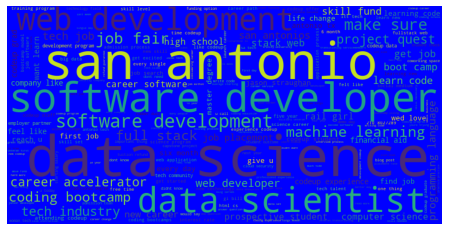

In [30]:
data = {k[0] + ' ' + k[1]: v for k, v in article_bigrams.to_dict().items()}
img = WordCloud(background_color='blue', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

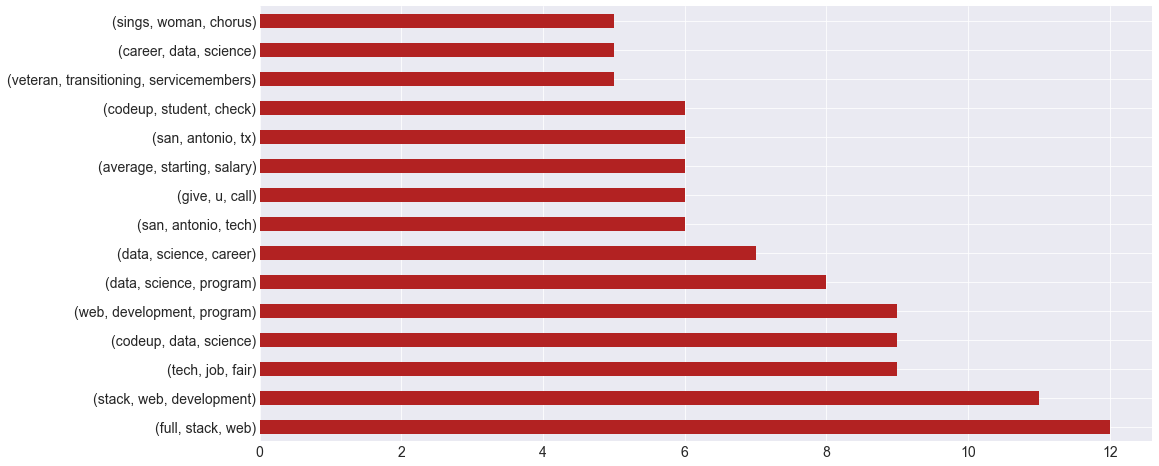

In [31]:
pd.Series(nltk.ngrams(words, 3)).value_counts().head(15).plot.barh(color='firebrick')

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [32]:
df = prepare.get_news_data()

In [33]:
df.head()

,topic,title,author,category,original,stemmed,lemmatized,clean
0,business,US firm buys Serum Institute parent's Czech un...,Krishna Veera Vanamali,business,US biotech firm Novavax has announced it's buy...,us biotech firm novavax ha announc it' buy cze...,u biotech firm novavax ha announced it's buyin...,us biotech firm novavax announced buying czech...
1,business,Google in talks to buy 5% stake in Vodafone Id...,Krishna Veera Vanamali,business,Google is exploring an investment in Vodafone ...,googl is explor an invest in vodafon idea as p...,google is exploring an investment in vodafone ...,google exploring investment vodafone idea part...
2,business,Microsoft in talks to buy 2.5% stake in Jio fo...,Anushka Dixit,business,Microsoft is in talks with Mukesh Ambani-led R...,microsoft is in talk with mukesh ambanil relia...,microsoft is in talk with mukesh ambaniled rel...,microsoft talks mukesh ambaniled reliance indu...
3,business,GE to sell its 129-year-old lightbulb business...,Anushka Dixit,business,General Electric has announced that it is goin...,gener electr ha announc that it is go to sell ...,general electric ha announced that it is going...,general electric announced going sell 129yearo...
4,business,Kent's Atta maker ad says 'maid's hands may be...,Pragya Swastik,business,Kent RO Systems withdrew an advertisement for ...,kent ro system withdrew an advertis for it att...,kent ro system withdrew an advertisement for i...,kent ro systems withdrew advertisement atta br...


In [34]:
news_words = clean(' '.join(df.clean))

In [35]:
news_bigrams = pd.Series(nltk.bigrams(news_words)).value_counts()
news_bigrams

(coronavirus, pandemic)    10
(social, medium)            6
(amid, coronavirus)         5
(u, president)              5
(report, said)              5
                           ..
(market, position)          1
(throw, added)              1
(sasha, added)              1
(coach, split)              1
(verification, key)         1
Length: 3239, dtype: int64

(-0.5, 799.5, 399.5, -0.5)

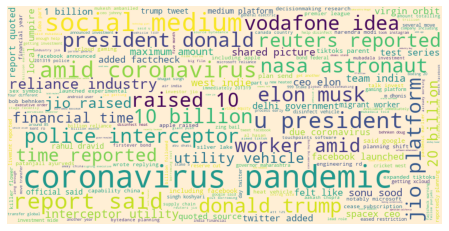

In [36]:
data = {k[0] + ' ' + k[1]: v for k, v in news_bigrams.to_dict().items()}
img = WordCloud(background_color='papayawhip', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

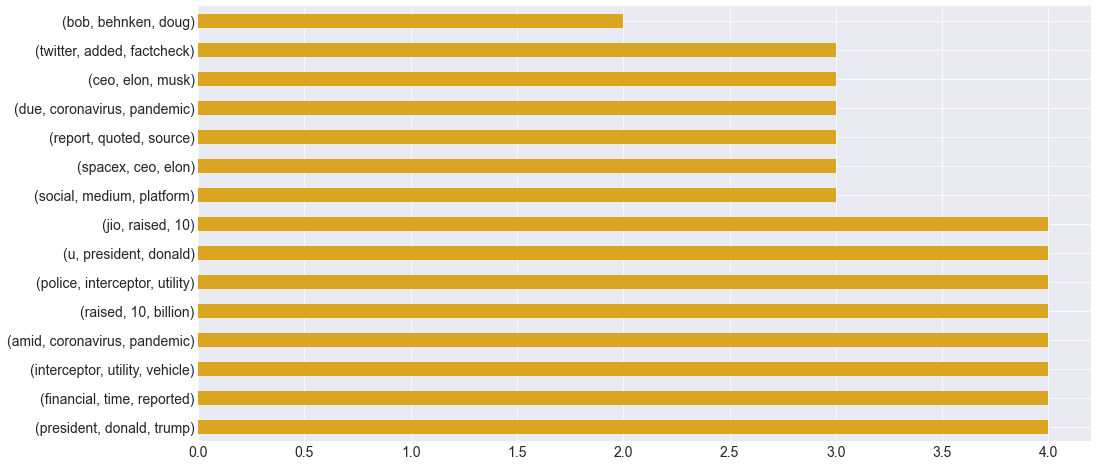

In [37]:
pd.Series(nltk.ngrams(news_words, 3)).value_counts().head(15).plot.barh(color='goldenrod')

In [38]:
business = df[df.topic == 'business']

In [39]:
business = clean(' '.join(df.clean))

In [41]:
business

['u',
 'biotech',
 'firm',
 'novavax',
 'announced',
 'buying',
 'czech',
 'republicbased',
 'praha',
 'vaccine',
 'unit',
 'cyrus',
 'poonawalla',
 'group',
 'also',
 'owns',
 'serum',
 'institute',
 'india',
 '1270',
 'crore',
 'facility',
 'expected',
 'provide',
 'annual',
 'capacity',
 '1',
 'billion',
 'dos',
 'antigen',
 'starting',
 '2021',
 'novavaxs',
 'covid19',
 'vaccine',
 'candidate',
 'novavax',
 'currently',
 'product',
 'market',
 'google',
 'exploring',
 'investment',
 'vodafone',
 'idea',
 'part',
 'u',
 'technology',
 'giant',
 'push',
 'india',
 'financial',
 'time',
 'reported',
 'said',
 'google',
 'considering',
 'buying',
 'stake',
 '5',
 'vodafone',
 'idea',
 'process',
 'early',
 'stage',
 'recently',
 'facebook',
 'announced',
 'investment',
 '57',
 'billion',
 'jio',
 'platform',
 '999',
 'stake',
 'microsoft',
 'talk',
 'mukesh',
 'ambaniled',
 'reliance',
 'industry',
 'buy',
 '25',
 'stake',
 'jio',
 'billion',
 'livemint',
 'reported',
 'come',
 'jio',


In [42]:
business_bigrams = pd.Series(nltk.bigrams(business)).value_counts()

In [43]:
business_bigrams

(coronavirus, pandemic)    10
(social, medium)            6
(amid, coronavirus)         5
(u, president)              5
(report, said)              5
                           ..
(market, position)          1
(throw, added)              1
(sasha, added)              1
(coach, split)              1
(verification, key)         1
Length: 3239, dtype: int64

(-0.5, 799.5, 399.5, -0.5)

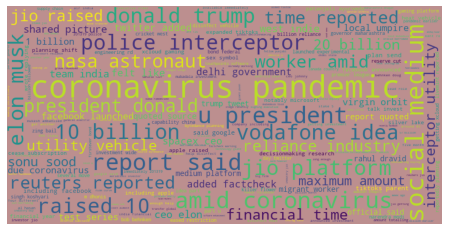

In [44]:
data = {k[0] + ' ' + k[1]: v for k, v in business_bigrams.to_dict().items()}
img = WordCloud(background_color='rosybrown', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

In [46]:
df.

,topic,title,author,category,original,stemmed,lemmatized,clean
0,business,US firm buys Serum Institute parent's Czech un...,Krishna Veera Vanamali,business,US biotech firm Novavax has announced it's buy...,us biotech firm novavax ha announc it' buy cze...,u biotech firm novavax ha announced it's buyin...,us biotech firm novavax announced buying czech...
1,business,Google in talks to buy 5% stake in Vodafone Id...,Krishna Veera Vanamali,business,Google is exploring an investment in Vodafone ...,googl is explor an invest in vodafon idea as p...,google is exploring an investment in vodafone ...,google exploring investment vodafone idea part...
2,business,Microsoft in talks to buy 2.5% stake in Jio fo...,Anushka Dixit,business,Microsoft is in talks with Mukesh Ambani-led R...,microsoft is in talk with mukesh ambanil relia...,microsoft is in talk with mukesh ambaniled rel...,microsoft talks mukesh ambaniled reliance indu...
3,business,GE to sell its 129-year-old lightbulb business...,Anushka Dixit,business,General Electric has announced that it is goin...,gener electr ha announc that it is go to sell ...,general electric ha announced that it is going...,general electric announced going sell 129yearo...
4,business,Kent's Atta maker ad says 'maid's hands may be...,Pragya Swastik,business,Kent RO Systems withdrew an advertisement for ...,kent ro system withdrew an advertis for it att...,kent ro system withdrew an advertisement for i...,kent ro systems withdrew advertisement atta br...
